In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
class SoftMax():
    def __init__(self,alpha = 0.01,itera = 500):
        """ alpha:学习率
            itera:迭代次数
            theta:参数矩阵,默认为0
            prob_matrix:概率矩阵  """
        self.alpha = alpha
        self.itera = itera
        self.theta = 0
        self.prob_matrix = 0
        
    def init_input(self,X,y = np.array([])):
        X_row = X.shape[0]
        X = np.c_[np.ones((X_row,1)),X]
        X_column = X.shape[1]
        if len(y) == 0:
            return X
        else:
            y = y.reshape((X_row,1))
            class_type = np.unique(y)
            y = y+1
            theta = np.zeros((len(class_type),X_column))
            return theta,X,y
        
        
    def softmax(self,X,theta):
        """计算各个类别的概率向量"""
        entropy = np.exp((theta.dot(X.T)).T)
        coffecient = np.sum(entropy,axis=1).reshape((X.shape[0],1))
        softmax = (1/coffecient)*entropy
        return softmax
    
    def cross_entropy(self,theta,X,y):
        row = X.shape[0]
        class_type = np.unique(y)
        indicater_matrix = np.zeros((row,len(class_type)))
        for i in range(len(class_type)):
            indicater_matrix[:,i]=y.T
            indicater_matrix[:,i]=np.where(indicater_matrix[:,i]==i+1,1,0)
        softmax=self.softmax(X,theta)
        return indicater_matrix-softmax
        
        
        
    def fit(self,X,y,alambda=1):
        theta,X,y = self.init_input(X,y)
        m = X.shape[0]
        for i in range(self.itera):
            cross_entropy1 = self.cross_entropy(theta,X,y)
            cross_entropy2 = (cross_entropy1.T).dot(X)
            theta = (1-self.alpha*alambda/m)*theta + (self.alpha/m)*cross_entropy2
        self.theta = theta
        
            
    def predict(self,X):
        X = self.init_input(X)
        prob_matrix = self.softmax(X,self.theta)
        self.prob_matrix = prob_matrix
        result = np.argmax(prob_matrix,axis=1)
        return result
    
    def score(self,y,y_predict):
        a = np.where(y==y_predict,1,0)
        return np.sum(a)/len(y)     

In [3]:
from sklearn import datasets
iris=datasets.load_iris()

In [4]:
X=iris['data'][:,(2,3)]
y=iris['target']

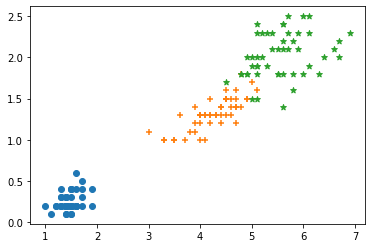

In [5]:
data=np.c_[y.reshape((len(y),1)),X]
X0=data[data[:,0]==0]
X1=data[data[:,0]==1]
X2=data[data[:,0]==2]
plt.scatter(X0[:,1],X0[:,2],marker='o')
plt.scatter(X1[:,1],X1[:,2],marker='+')
plt.scatter(X2[:,1],X2[:,2],marker='*')

In [6]:
softmax=SoftMax(0.35,1000)

In [7]:
softmax.fit(X,y,0)

In [8]:
X_test = X
y_predict = softmax.predict(X_test)
softmax.score(y,y_predict)

0.96